In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
import cv2
import os
import numpy as np

borderSize = (9, 6)
squareSize = 1
boardPoints = []
for y in range(borderSize[1]):
    for x in range(borderSize[0]):
        boardPoints.append((x * squareSize, y * squareSize, 0))
boardPoints = np.array(boardPoints, np.float32)

imagePoints = []
objectPoints = []

# 이미지가 있는 폴더 경로 지정 (예시 경로)
folder_path = '/content/drive/MyDrive/ai_hub/calibration_images/'

# 폴더 내의 모든 파일 리스트 가져오기
file_list = os.listdir(folder_path)

# jpg 이미지 파일들을 저장할 리스트
jpg_images = []

# 이미지 파일들을 순회하며 불러오기
for filename in file_list:
    if filename.endswith('.jpg'):  # jpg 이미지 파일인지 확인
        image_path = os.path.join(folder_path, filename)
        image = cv2.imread(image_path)

        if image is not None:
            jpg_images.append(image)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            ret, corners = cv2.findChessboardCorners(gray, borderSize, None)

            if ret:
                objectPoints.append(boardPoints)
                imagePoints.append(corners)

        else:
            print(f"{filename} 파일을 불러오는데 실패했습니다.")

# 보정된 카메라 행렬과 왜곡 계수 계산
h, w = gray.shape
_, cameraMatrix, distCoeffs, rvecs, tvecs = cv2.calibrateCamera(objectPoints, imagePoints, (w, h), None, None)
nuCameraMatrix, _ = cv2.getOptimalNewCameraMatrix(cameraMatrix, distCoeffs, (w, h), 0)

# 보정된 카메라 행렬과 왜곡 계수를 사용하여 이미지 보정
for image in jpg_images:
    dst = cv2.undistort(image, cameraMatrix, distCoeffs, None, nuCameraMatrix)
    map1, map2 = cv2.initUndistortRectifyMap(cameraMatrix, distCoeffs, None, nuCameraMatrix, (w, h), cv2.CV_16SC2)
    dst = cv2.remap(dst, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
    # dst에 보정된 이미지가 저장됩니다.

In [ ]:
f = open('/content/drive/MyDrive/ai_hub/calibration_images/calib.dat', 'wb')
np.save(f, map1)
np.save(f, map2)
f.close()

In [ ]:
f = open('/content/drive/MyDrive/ai_hub/calibration_images/calib.dat', 'rb')
map1 = np.load(f)
map2 = np.load(f)

In [ ]:
corners.shape

(54, 1, 2)

In [ ]:
rvecs

(array([[-0.08115216],
        [ 0.080971  ],
        [ 1.54210377]]),
 array([[-0.18521982],
        [ 0.09513032],
        [ 1.53864624]]),
 array([[-0.07507919],
        [ 0.0920515 ],
        [ 1.54728639]]),
 array([[-0.187942  ],
        [ 0.09253833],
        [ 1.53911283]]),
 array([[-0.07887021],
        [ 0.09160191],
        [ 1.54339623]]))

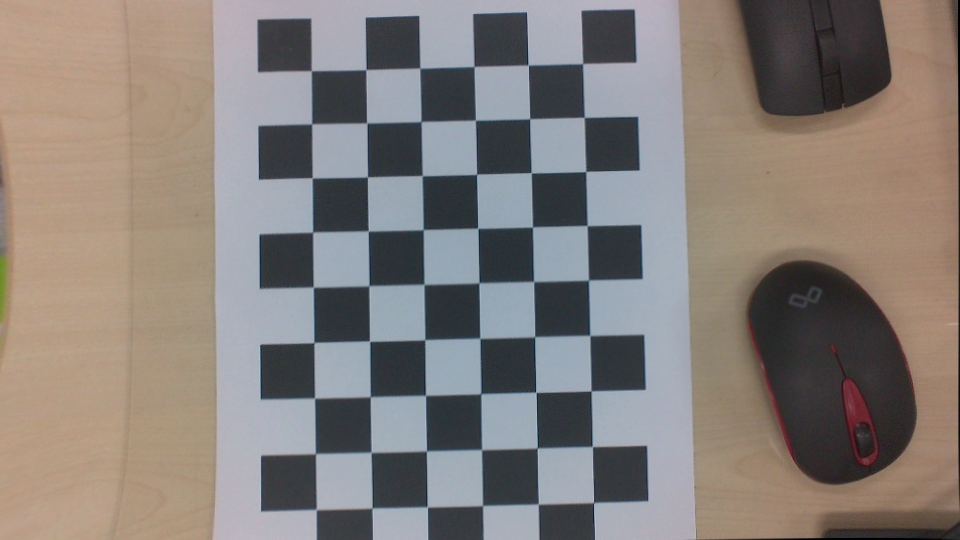

In [ ]:
cv2_imshow(dst)

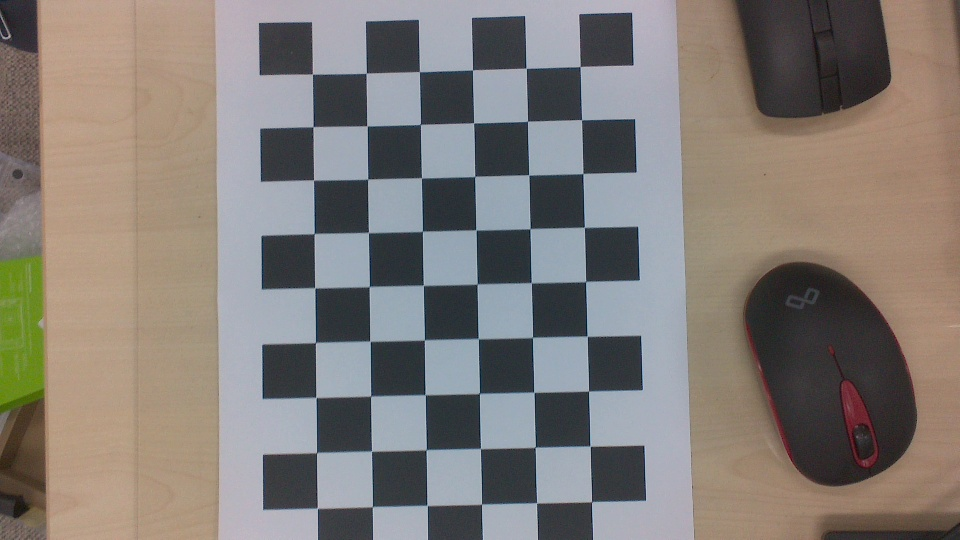

In [ ]:
cv2_imshow(image)

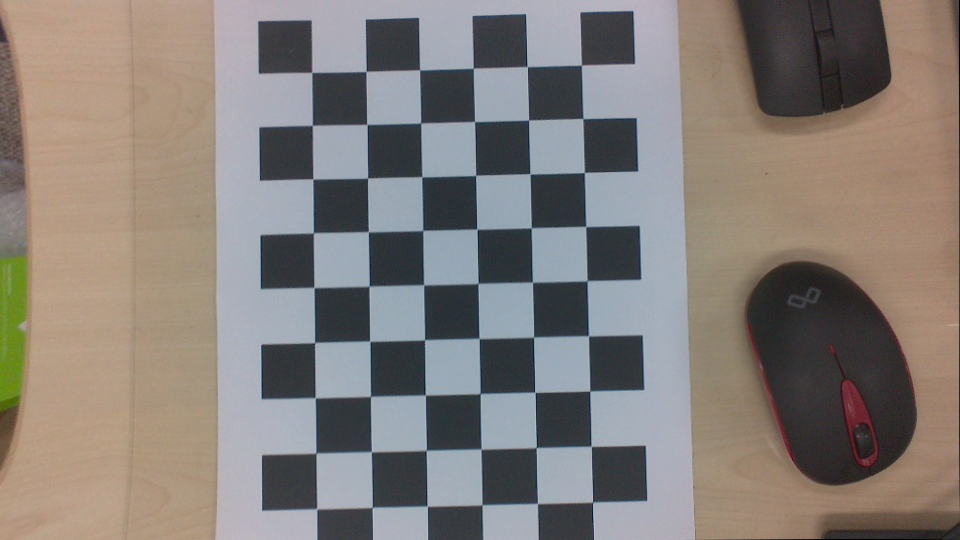

In [ ]:
rec = cv2.remap(image, map1, map2, cv2.INTER_LINEAR)
cv2_imshow(rec)